In [19]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split Data
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));



df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)

/Users/jingjie_ma/Desktop/502project: ['.DS_Store', 'nyse', 'data', 'price-volume-data-for-all-us-stocks-etfs']
/Users/jingjie_ma/Desktop/502project/nyse: ['prices-split-adjusted.csv', '.DS_Store', 'fundamentals.csv', 'prices.csv', 'securities.csv', '.ipynb_checkpoints', 'nyse_test.ipynb']


In [20]:
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 1/5/16 to 12/30/16
Data columns (total 6 columns):
Mnemonic      851264 non-null object
StartPrice    851264 non-null float64
ClosePrice    851264 non-null float64
MinPrice      851264 non-null float64
MaxPrice      851264 non-null float64
Volume        851264 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 45.5+ MB


,Mnemonic,StartPrice,ClosePrice,MinPrice,MaxPrice,Volume
Date,,,,,,
1/5/16,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1/6/16,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
1/7/16,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
1/8/16,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
1/11/16,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


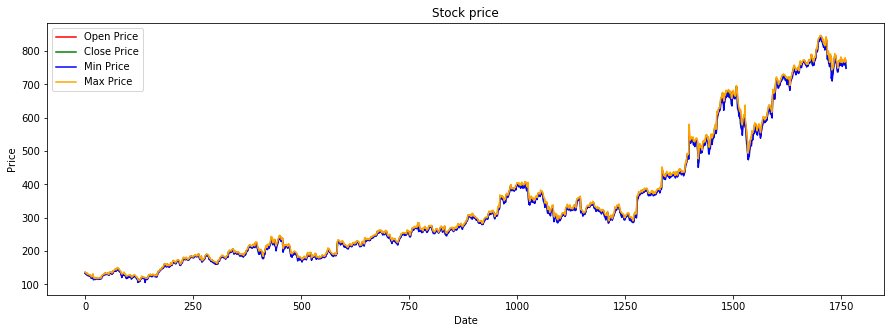

In [21]:
plt.figure(figsize=(15, 5));
#plt.subplot(1,2,1);
plt.plot(df[df.Mnemonic == 'AMZN'].StartPrice.values, color ='red', label ='Open Price')
plt.plot(df[df.Mnemonic == 'AMZN'].ClosePrice.values, color ='green', label='Close Price')
plt.plot(df[df.Mnemonic == 'AMZN'].MinPrice.values, color ='blue', label = "Min Price")
plt.plot(df[df.Mnemonic == 'AMZN'].MaxPrice.values, color ='orange', label ='Max Price')
plt.title('Stock price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
#plt.show()



In [22]:
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['StartPrice'] = min_max_scaler.fit_transform(df["StartPrice"].values.reshape(-1,1))
    df['MaxPrice'] = min_max_scaler.fit_transform(df["MaxPrice"].values.reshape(-1,1))
    df['MinPrice'] = min_max_scaler.fit_transform(df["MinPrice"].values.reshape(-1,1))
    df['ClosePrice'] = min_max_scaler.fit_transform(df['ClosePrice'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]


# choose one stock
df_stock = df[df.Mnemonic == 'AMZN'].copy()
df_stock.drop(['Mnemonic'],1,inplace=True)
df_stock.drop(['Volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)


df_stock.columns.values =  ['StartPrice', 'ClosePrice', 'MinPrice', 'MaxPrice']
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


/Users/jingjie_ma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


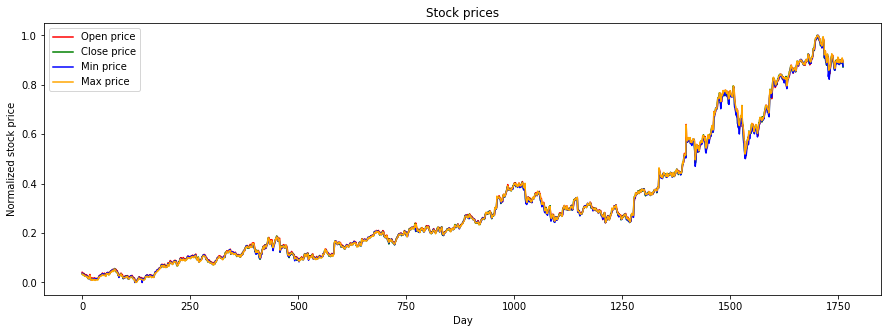

In [23]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.StartPrice.values, color='red', label='Open price')
plt.plot(df_stock_norm.ClosePrice.values, color='green', label='Close price')
plt.plot(df_stock_norm.MinPrice.values, color='blue', label='Min price')
plt.plot(df_stock_norm.MaxPrice.values, color='orange', label='Max price')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('Stock prices')
plt.xlabel('Day')
plt.ylabel('Normalized stock price')
plt.legend(loc='best')
plt.show()

In [24]:
from tensorflow.python.framework import ops
import tensorflow.compat.v1 as tfc
tfc.disable_v2_behavior()

In [25]:
# use basic cell in tensorflow
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]


# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]



ops.reset_default_graph()

X = tfc.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tfc.placeholder(tf.float32, [None, n_outputs])

In [26]:

tfc.disable_v2_behavior()

In [27]:
# use Basic RNN Cell
layers = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]


In [28]:
multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers)

In [29]:
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [30]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 

In [31]:
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)

In [32]:
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              

In [33]:
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

In [34]:
# run graph
with tf.compat.v1.Session() as sess: 
    sess.run(tf.compat.v1.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))
        y_train_pred = sess.run(outputs, feed_dict={X: x_train})
        y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
        y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.028512/0.107742
4.99 epochs: MSE train/valid = 0.000122/0.001406
9.97 epochs: MSE train/valid = 0.000091/0.000749
14.96 epochs: MSE train/valid = 0.000081/0.000633
19.94 epochs: MSE train/valid = 0.000074/0.000561
24.93 epochs: MSE train/valid = 0.000081/0.000402
29.91 epochs: MSE train/valid = 0.000080/0.000732
34.90 epochs: MSE train/valid = 0.000059/0.000375
39.89 epochs: MSE train/valid = 0.000065/0.000363
44.87 epochs: MSE train/valid = 0.000081/0.000369
49.86 epochs: MSE train/valid = 0.000057/0.000329
54.84 epochs: MSE train/valid = 0.000067/0.000308
59.83 epochs: MSE train/valid = 0.000059/0.000272
64.81 epochs: MSE train/valid = 0.000050/0.000347
69.80 epochs: MSE train/valid = 0.000052/0.000303
74.78 epochs: MSE train/valid = 0.000050/0.000291
79.77 epochs: MSE train/valid = 0.000052/0.000291
84.76 epochs: MSE train/valid = 0.000061/0.000409
89.74 epochs: MSE train/valid = 0.000061/0.000378
94.73 epochs: MSE train/valid = 0.000050/0.000256
99.

correct sign prediction for close - open price for train/valid/test: 0.70/0.51/0.49


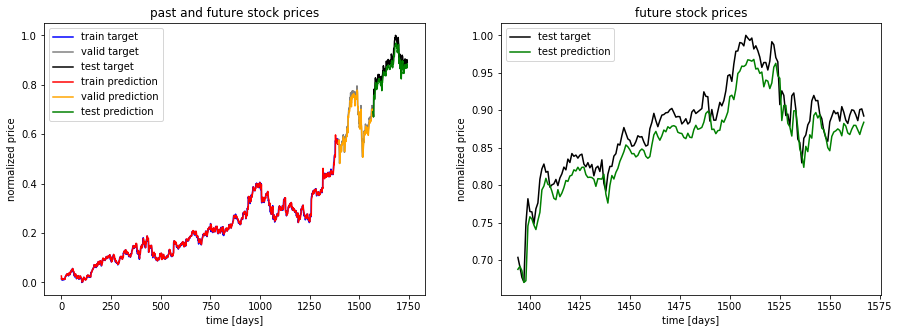

In [35]:
ft = 1 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='Train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='Validation prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='Test prediction')

plt.title('Stock Prices')
plt.xlabel('Days')
plt.ylabel('Normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Future Stock Prices')
plt.xlabel('Days')
plt.ylabel('Normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('Crossover prediction for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))